In [65]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
import glob
import os
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Point
from adjustText import adjust_text
import statsmodels.api as sm

# 2025 - 2029 Budget Plan by Department

In [67]:
data_directory = './data'
df = pd.read_csv(os.path.join(data_directory, 'FY25_Capital.csv')).fillna(0)

In [69]:
print(df.head())

   _id                             Department  \
0    1  Boston Centers for Youth and Families   
1    2  Boston Centers for Youth and Families   
2    3  Boston Centers for Youth and Families   
3    4  Boston Centers for Youth and Families   
4    5  Boston Centers for Youth and Families   

                                 Project_Name  \
0       BCYF Security and Technology Upgrades   
1  BCYF Tobin Community Center Retaining Wall   
2             BCYF North End Community Center   
3                                Pool Repairs   
4                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  Improvements to technology infrastructure and ...   
1  Repair or replace the retaining wall adjacent ...   
2  Design and construct a new North End Community...   
3  Renovate and upgrade locker rooms and pools in...   
4  Engage youth across the City using participato...   

                           PM_Department           Project_Status  \
0  B

In [71]:
print(df['Total_Project_Budget'].describe())

count    4.260000e+02
mean     1.101801e+07
std      2.533627e+07
min      5.000000e+04
25%      1.000000e+06
50%      2.387500e+06
75%      9.000000e+06
max      2.235915e+08
Name: Total_Project_Budget, dtype: float64


In [73]:
project_count_per_department = df['Department'].value_counts().reset_index()
project_count_per_department.columns = ['Department', 'Project_Count']
print(project_count_per_department)

                                 Department  Project_Count
0           Parks and Recreation Department             98
1                     Boston Public Schools             72
2                   Public Works Department             64
3                 Transportation Department             50
4                           Fire Department             23
5     Boston Centers for Youth and Families             17
6                     Boston Public Library             15
7                         Police Department             15
8            Property Management Department             14
9                    Environment Department             12
10                 Public Health Commission             11
11   Boston Planning and Development Agency             10
12  Department of Innovation and Technology              9
13                 Office of Arts & Culture              8
14                Mayor's Office of Housing              7
15                     Emergency Management             

In [75]:
budget_range_per_department = df.groupby('Department')['Total_Project_Budget'].agg(['min', 'max']).reset_index()
print(budget_range_per_department)

                                 Department      min        max
0     Boston Centers for Youth and Families  1000000   88000000
1    Boston Planning and Development Agency   500000    7900000
2                     Boston Public Library   250000   50000000
3                     Boston Public Schools    50000  223591467
4   Department of Innovation and Technology   650000   27000000
5                      Emergency Management  1500000    1500000
6                    Environment Department   350000   75000000
7                           Fire Department   360000   46000000
8                 Mayor's Office of Housing  4000000   52000000
9                  Office of Arts & Culture   100000   22350000
10          Parks and Recreation Department    50000   50346965
11                        Police Department    60000   53794000
12           Property Management Department   500000  165000000
13                 Public Health Commission   200000   38220000
14                  Public Works Departm

In [77]:
total_budget_fy25 = df['Total_Project_Budget'].sum()
print(f"Total FY25 Capital Budget: ${total_budget_fy25 / 1e9:.2f} billion")

Total FY25 Capital Budget: $4.69 billion


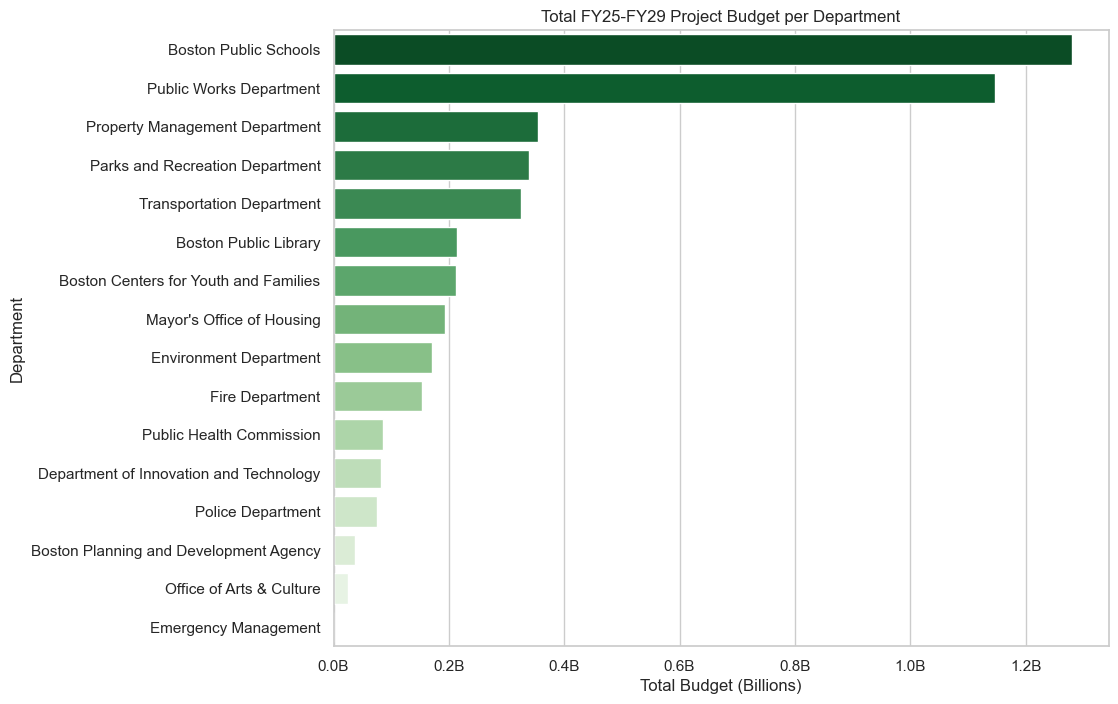

In [79]:
# Aggregate the total project budget by department
budget_per_department = df.groupby('Department')['Total_Project_Budget'].sum().reset_index()

# Sort values for a cleaner plot
budget_per_department = budget_per_department.sort_values(by='Total_Project_Budget', ascending=False)

# Set the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the barplot with 'hue' assigned and 'legend=False' to avoid the legend display
sns.barplot(
    data=budget_per_department,
    x='Total_Project_Budget',
    y='Department',
    hue='Department',
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Format the x-axis to display in billions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Add labels and title
plt.xlabel('Total Budget (Billions)')
plt.ylabel('Department')
plt.title('Total FY25-FY29 Project Budget per Department')

# Display the plot
plt.show()

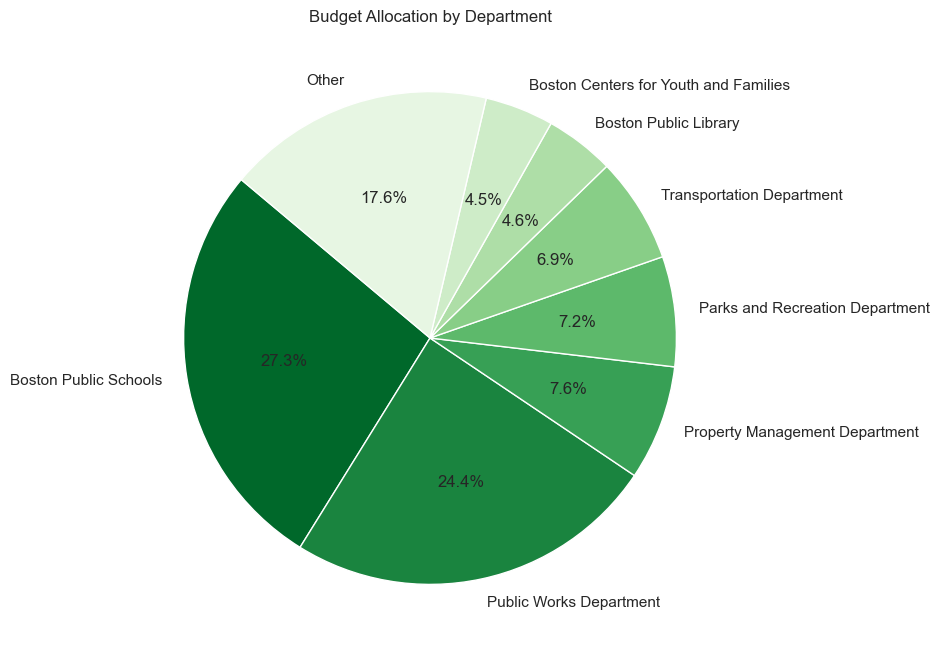

In [81]:
# Calculate the total budget for percentage calculation
total_budget = budget_per_department['Total_Project_Budget'].sum()

# Define a threshold percentage
threshold_percentage = 4.5

# Filter departments with a contribution less than the threshold and group them under "Other"
budget_per_department['Percentage'] = (budget_per_department['Total_Project_Budget'] / total_budget) * 100
filtered_data = budget_per_department[budget_per_department['Percentage'] >= threshold_percentage]
other_budget = budget_per_department[budget_per_department['Percentage'] < threshold_percentage]['Total_Project_Budget'].sum()

# Create an "Other" row as a DataFrame
if other_budget > 0:
    other_row = pd.DataFrame({
        'Department': ['Other'],
        'Total_Project_Budget': [other_budget],
        'Percentage': [(other_budget / total_budget) * 100]
    })
    
    # Concatenate the "Other" row with the filtered data
    filtered_data = pd.concat([filtered_data, other_row], ignore_index=True)

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_data['Total_Project_Budget'],
    labels=filtered_data['Department'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Greens_r', n_colors=len(filtered_data))
)
plt.title('Budget Allocation by Department')

# Display the plot
plt.show()


# Public Schools Budget Analysis

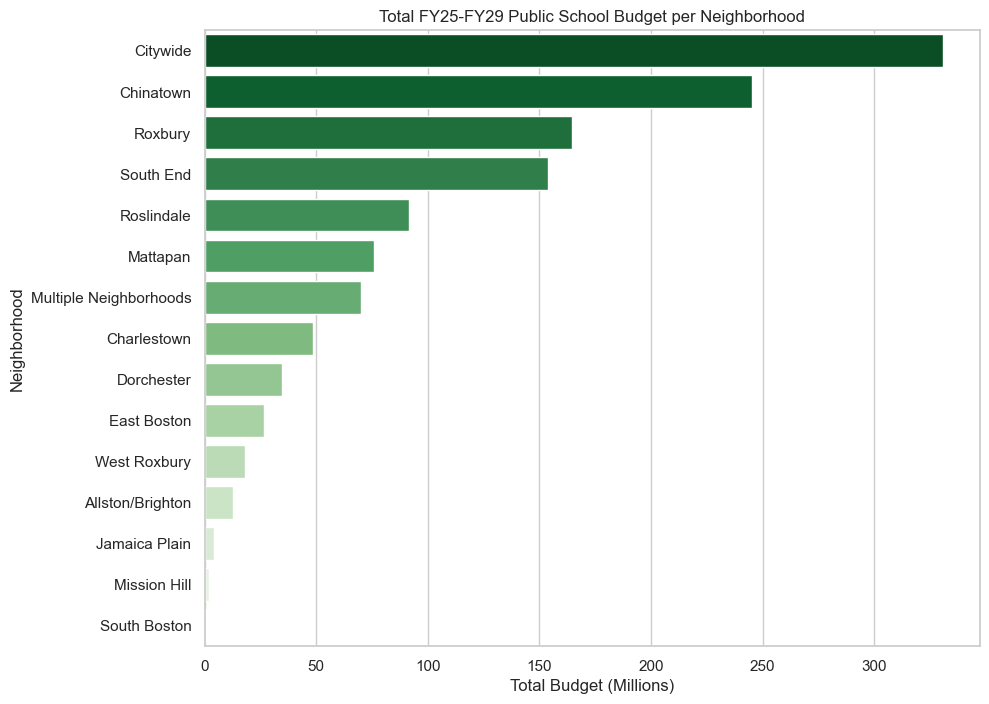

In [83]:
bps_data = df[df["Department"] == "Boston Public Schools"]

# Filter for "Boston Public Schools"
bps_data = df[df["Department"] == "Boston Public Schools"]

# Aggregate total spending by neighborhood
spending_by_neighborhood = bps_data.groupby("Neighborhood")["Total_Project_Budget"].sum().reset_index()
spending_by_neighborhood = spending_by_neighborhood.sort_values(by='Total_Project_Budget', ascending=False)

# Set the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the barplot with 'hue' assigned and 'legend=False' to avoid the legend display
sns.barplot(
    data=spending_by_neighborhood,
    x='Total_Project_Budget',
    y='Neighborhood',
    hue='Neighborhood',
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Format the x-axis to display in billions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}'))

# Add labels and title
plt.xlabel('Total Budget (Millions)')
plt.ylabel('Neighborhood')
plt.title('Total FY25-FY29 Public School Budget per Neighborhood')

# Display the plot
plt.show()

# bps_data[bps_data["Neighborhood"] == "Chinatown"].head()

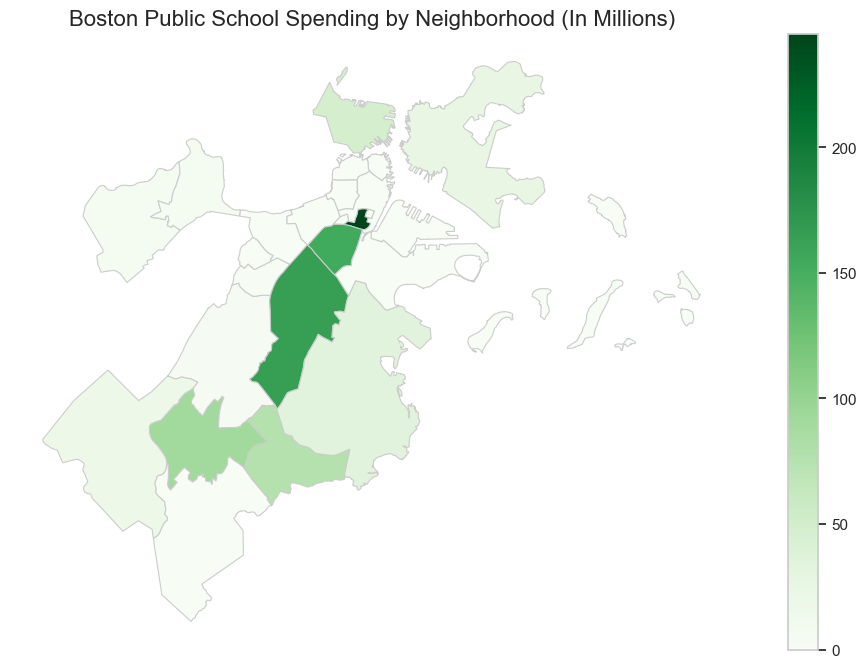

              Neighborhood  Total_Project_Budget
0                 Citywide           330566389.0
1                Chinatown           245372172.0
2                  Roxbury           164508325.0
3                South End           153637185.0
4               Roslindale            91770000.0
5                 Mattapan            76000000.0
6   Multiple Neighborhoods            70076721.0
7              Charlestown            48595000.0
8               Dorchester            34798000.0
9              East Boston            26815000.0
10            West Roxbury            18150000.0
14                 Allston             6468950.0
15                Brighton             6468950.0
11           Jamaica Plain             4275000.0
12            Mission Hill             1892212.0
13            South Boston              500000.0


In [85]:
# Load GeoJSON for Boston neighborhoods
geojson_path = "data/boston_neighborhoods.geojson"
gdf = gpd.read_file(geojson_path)

split_row = spending_by_neighborhood[spending_by_neighborhood["Neighborhood"] == "Allston/Brighton"]

allston_row = split_row.copy()
allston_row["Neighborhood"] = "Allston"
allston_row["Total_Project_Budget"] /= 2

brighton_row = split_row.copy()
brighton_row["Neighborhood"] = "Brighton"
brighton_row["Total_Project_Budget"] /= 2

spending_by_neighborhood = spending_by_neighborhood[
    spending_by_neighborhood["Neighborhood"] != "Allston/Brighton"
]
spending_by_neighborhood = pd.concat([spending_by_neighborhood, allston_row, brighton_row], ignore_index=True)
spending_by_neighborhood = spending_by_neighborhood.sort_values(by='Total_Project_Budget', ascending=False)

gdf = gdf.merge(
    spending_by_neighborhood,
    how="left",
    left_on="Name",
    right_on="Neighborhood"
)

# Fill missing values for neighborhoods without spending data
gdf["Total_Project_Budget"] = gdf["Total_Project_Budget"].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
plot = gdf.plot(
    column="Total_Project_Budget",
    cmap="Greens",
    legend=False,
    legend_kwds={"label": "Total Budget (in USD)", "shrink": 0.8},
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8"
)

colorbar = plot.get_figure().colorbar(plot.get_children()[0], ax=ax)
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1e6:.0f}"))

# Add title and remove axes
plt.title("Boston Public School Spending by Neighborhood (In Millions)", fontsize=16)
plt.axis("off")
plt.show()
print(spending_by_neighborhood)

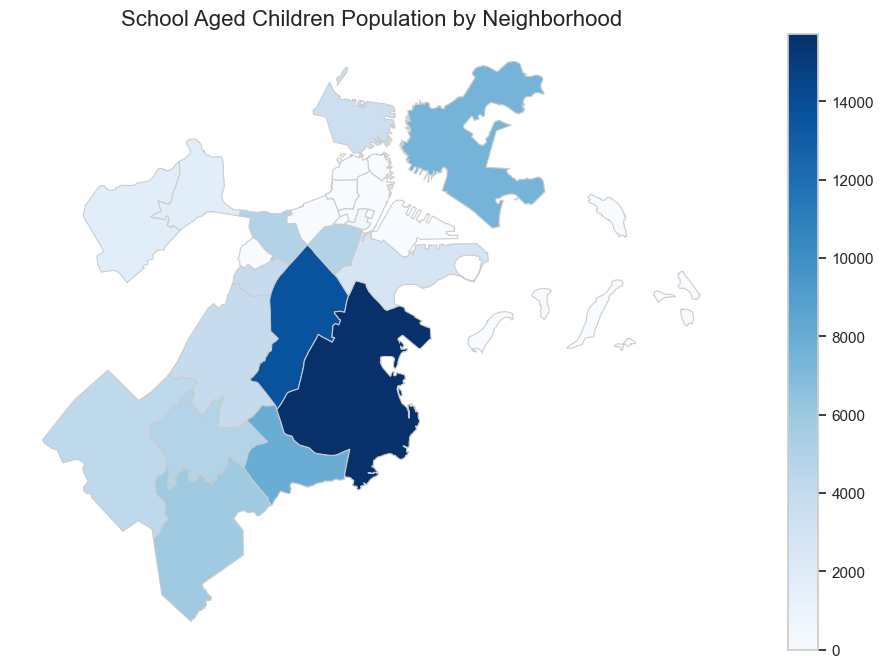

In [87]:
# Population of school aged children by neighborhood
# https://www.bostonpublicschools.org/Page/7433
population_data = {
    "Neighborhood": [
        "Citywide", "Allston", "Brighton", "Charlestown",
        "Chinatown", "Dorchester", "East Boston", "Fenway",
        "Hyde Park", "Jamaica Plain", "Mattapan", "Mission Hill",
        "Roslindale", "Roxbury", "South Boston",
        "South End", "West Roxbury"
    ],
    "Population": [
        87964, 1770, 1769, 3476,
        660, 15728, 7453, 4929,
        5885, 3900, 7936, 3900,
        4909, 13645, 2732,
        4929, 4343
    ]
}

population_df = pd.DataFrame(population_data)

gdf = gdf.merge(population_df, how="left", left_on="Name", right_on="Neighborhood")

# Fill missing values for neighborhoods without population data
gdf["Population"] = gdf["Population"].fillna(0)

# Plotting population intensity
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Create a choropleth plot for Population
plot = gdf.plot(
    column="Population",
    cmap="Blues",
    legend=False,  # We will add a custom colorbar below
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8"
)

# Add title
plt.title("School Aged Children Population by Neighborhood", fontsize=16)

colorbar = plot.get_figure().colorbar(plot.get_children()[0], ax=ax)
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1e0:.0f}"))

# Hide axes for better visualization
plt.axis("off")

# Display the plot
plt.show()

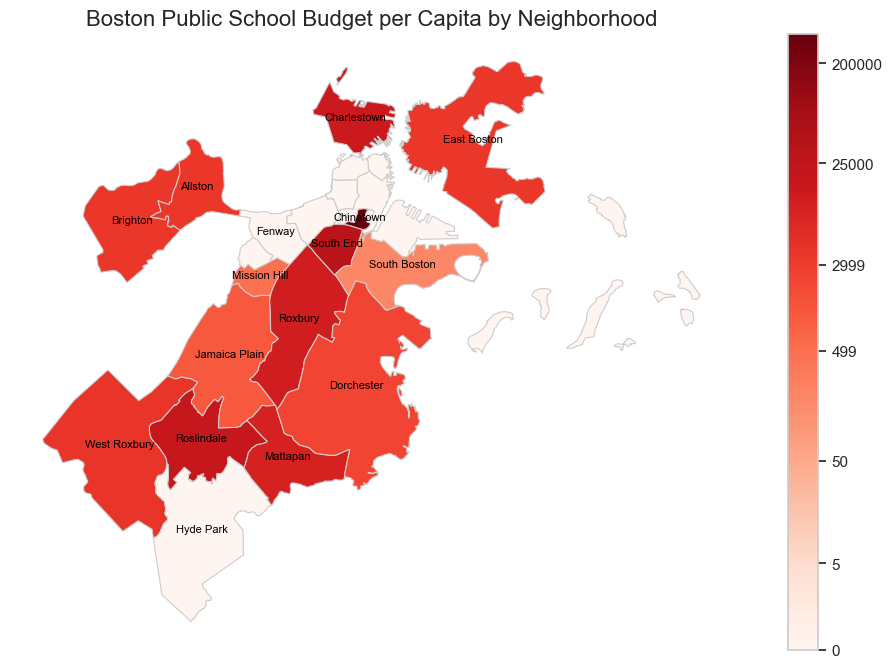

In [89]:
gdf["Spending_Per_Capita"] = gdf["Total_Project_Budget"] / gdf["Population"]
gdf["Spending_Per_Capita"] = gdf["Spending_Per_Capita"].fillna(0)

# Apply a log transformation to avoid large disparities
gdf["Spending_Per_Capita_Log"] = np.log1p(gdf["Spending_Per_Capita"])
gdf["Spending_Per_Capita"] = gdf["Spending_Per_Capita"].fillna(0)

# Plot using the transformed Spending_Per_Capita_Log
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

plot = gdf.plot(
    column="Spending_Per_Capita_Log",  # Use the log-transformed Spending per Capita
    cmap="Reds",
    legend=False,
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
)

for _, row in gdf.iterrows():
    if row["Spending_Per_Capita"] > 0 or row["Spending_Per_Capita"] == 0 and row["Population"] != 0:
        ax.annotate(
            text=row["Name"],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha="center",
            fontsize=8,
            color="black"
        )

tick_positions = np.log1p([0, 5, 50, 500, 3000, 25000, 200000.1])  # Log-transformed values
tick_labels = [f"{int(np.expm1(tick))}" for tick in tick_positions]  # Reverse the log scale for labels
colorbar = plot.get_figure().colorbar(plot.get_children()[0], ax=ax)
colorbar.set_ticks(tick_positions)  # Set tick positions
colorbar.set_ticklabels(tick_labels)  # Set custom tick labels
# Set plot title and remove axes
plt.title("Boston Public School Budget per Capita by Neighborhood", fontsize=16)
plt.axis("off")

# Show the plot
plt.show()

In [91]:
sorted_spending = gdf[["Name", "Spending_Per_Capita"]].sort_values(by="Spending_Per_Capita", ascending=False)

# Display the sorted table
sorted_spending = sorted_spending[(sorted_spending["Spending_Per_Capita"] > 0) | (sorted_spending["Name"] == "Hyde Park")
    | (sorted_spending["Name"] == "Fenway")]
print(sorted_spending.to_string(index=False))

         Name  Spending_Per_Capita
    Chinatown        371776.018182
    South End         31170.051735
   Roslindale         18694.235078
  Charlestown         13980.149597
      Roxbury         12056.308171
     Mattapan          9576.612903
 West Roxbury          4179.138844
     Brighton          3656.840023
      Allston          3654.774011
  East Boston          3597.880048
   Dorchester          2212.487284
Jamaica Plain          1096.153846
 Mission Hill           485.182564
 South Boston           183.016105
    Hyde Park             0.000000
       Fenway             0.000000


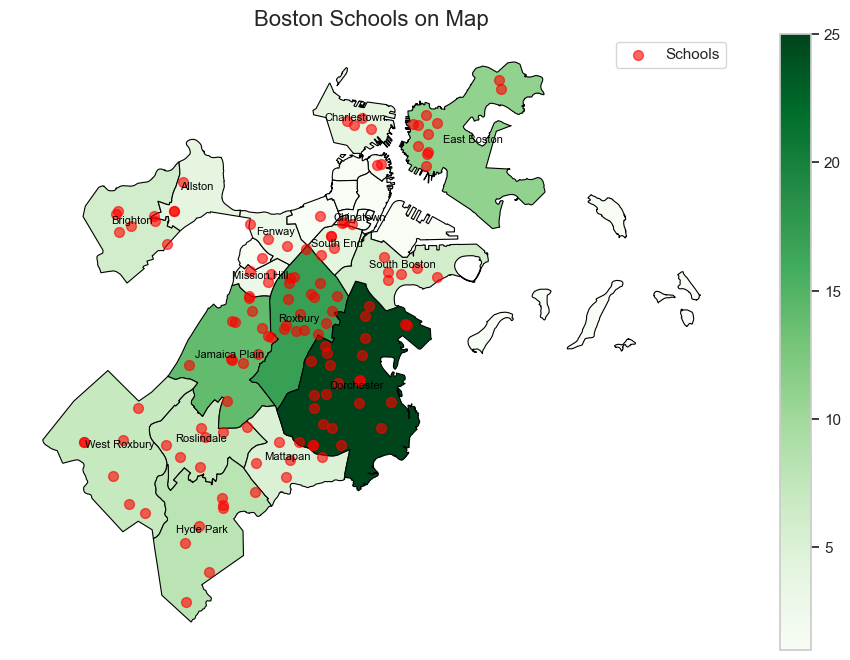

In [93]:
boston_map = gpd.read_file("data/boston_neighborhoods.geojson")
school_data = pd.read_csv("data/Public_Schools.csv") 
school_data = school_data.dropna(subset=["X", "Y"])  # Remove rows with missing coordinates

school_data["geometry"] = school_data.apply(lambda row: Point(row["X"], row["Y"]), axis=1)
schools_gdf = gpd.GeoDataFrame(school_data, geometry="geometry", crs="EPSG:4326") 

schools_in_neighborhoods = gpd.sjoin(boston_map, schools_gdf, how="left", predicate="contains")
school_counts = schools_in_neighborhoods.groupby("Name").size().reset_index(name="School_Count")

boston_map = boston_map.merge(school_counts, how="left", left_on="Name", right_on="Name")
boston_map["School_Count"] = boston_map["School_Count"].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot = boston_map.plot(
    column="School_Count",
    cmap="Greens",
    legend=True,
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
)

schools_gdf.plot(
    ax=ax,
    color="red", 
    markersize=50,   
    alpha=0.6,           
    label="Schools",    
    zorder=3,         
)

for _, row in gdf.iterrows():
    if row["Spending_Per_Capita"] > 0 or row["Spending_Per_Capita"] == 0 and row["Population"] != 0:
        ax.annotate(
            text=row["Name"],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha="center",
            fontsize=8,
            color="black"
        )

ax.axis("off")
plt.title("Boston Schools on Map", fontsize=16)
plt.legend()
plt.show()

In [95]:
boston_map = boston_map.merge(spending_by_neighborhood[['Neighborhood', 'Total_Project_Budget']], 
                               left_on="Name", right_on="Neighborhood", how="left")

# Calculate spending per school (avoid division by zero)
boston_map["Spending_Per_School"] = boston_map["Total_Project_Budget"] / boston_map["School_Count"]
boston_map["Spending_Per_School"] = boston_map["Spending_Per_School"].fillna(0)

spending_table = boston_map[["Name", "School_Count", "Spending_Per_School"]]
spending_table = spending_table[spending_table["School_Count"] > 0].reset_index(drop=True)

spending_table = spending_table.sort_values(by="Spending_Per_School", ascending=False)
spending_table["Spending_Per_School"] = spending_table["Spending_Per_School"].apply(lambda x: f"${x:,.2f}")
print(spending_table.to_string(index=False))

                   Name  School_Count Spending_Per_School
              Chinatown             1     $245,372,172.00
              South End             4      $38,409,296.25
               Mattapan             5      $15,200,000.00
             Roslindale             7      $13,110,000.00
            Charlestown             4      $12,148,750.00
                Roxbury            17       $9,676,960.29
           West Roxbury             7       $2,592,857.14
            East Boston            11       $2,437,727.27
                Allston             4       $1,617,237.50
             Dorchester            25       $1,391,920.00
               Brighton             6       $1,078,158.33
           Mission Hill             3         $630,737.33
          Jamaica Plain            14         $305,357.14
           South Boston             6          $83,333.33
South Boston Waterfront             1               $0.00
              Hyde Park             8               $0.00
              

# Comparing Average Household Income to BPS Budget by Neighborhood

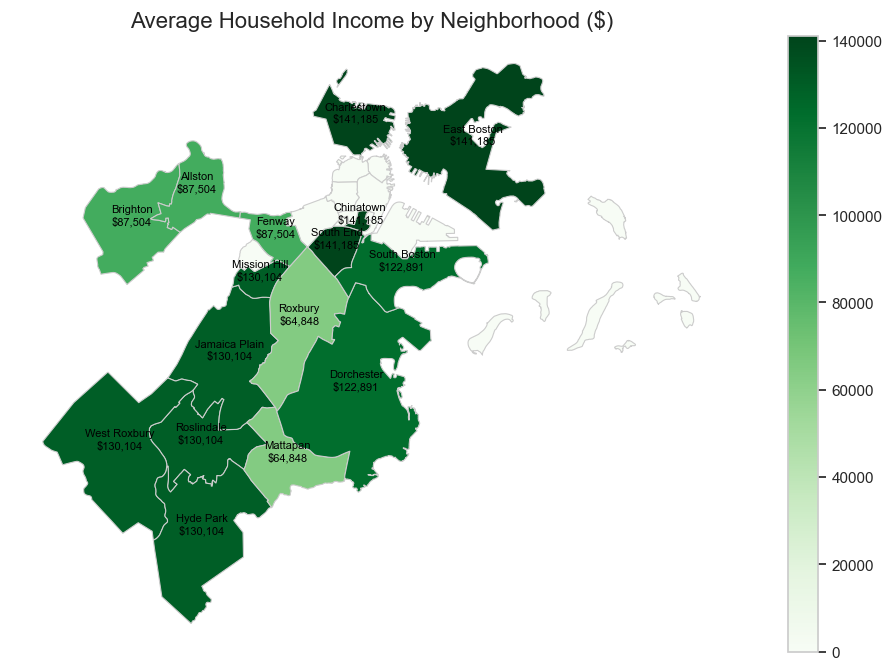

 Neighborhood   Income
  Charlestown $141,185
    Chinatown $141,185
  East Boston $141,185
    South End $141,185
    Hyde Park $130,104
Jamaica Plain $130,104
 Mission Hill $130,104
   Roslindale $130,104
 West Roxbury $130,104
   Dorchester $122,891
 South Boston $122,891
      Allston  $87,504
     Brighton  $87,504
       Fenway  $87,504
     Mattapan  $64,848
      Roxbury  $64,848


In [97]:
# Data from the most recent American Community Survey on average income in Boston neighborhoods
# https://data.census.gov/mdat/#/search?ds=ACSPUMS1Y2022&vv=%2aHINCP&rv=ucgid&wt=WGTP&g=795P200US2500801,2500802,2500803,2500804,2500805

income_data = {
    "Neighborhood": [
        "Allston", "Brighton", "Charlestown",
        "Chinatown", "Dorchester", "East Boston", "Fenway",
        "Hyde Park", "Jamaica Plain", "Mattapan", "Mission Hill",
        "Roslindale", "Roxbury", "South Boston",
        "South End", "West Roxbury"
    ],
    "Income": [
        87504, 87504, 141185,
        141185, 122891, 141185, 87504,
        130104, 130104, 64848, 130104,
        130104, 64848, 122891,
        141185, 130104
    ]
}

income_df = pd.DataFrame(income_data)

gdf = gdf.merge(income_df, how="left", left_on="Name", right_on="Neighborhood")

# Fill missing values for neighborhoods without population data
gdf["Income"] = gdf["Income"].fillna(0)

# Plotting population intensity
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

plot = gdf.plot(
    column="Income",
    cmap="Greens",
    legend=False, 
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8"
)

for _, row in gdf.iterrows():
    if row["Spending_Per_Capita"] > 0 or row["Spending_Per_Capita"] == 0 and row["Population"] != 0:
        ax.annotate(
            text=row["Name"] + "\n$" + str(int(row["Income"]) // 1000) + "," + str(int(row["Income"]) % 1000),
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha="center",
            fontsize=8,
            color="black"
        )

plt.title("Average Household Income by Neighborhood ($)", fontsize=16)

colorbar = plot.get_figure().colorbar(plot.get_children()[0], ax=ax)
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1e0:.0f}"))

plt.axis("off")

# Display the plot
plt.show()

income_df = income_df.sort_values(by="Income", ascending=False)
income_df["Income"] = income_df["Income"].apply(lambda x: f"${x:,.0f}")
print(income_df.to_string(index=False))

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


                             OLS Regression Results                            
Dep. Variable:     Spending_Per_Capita   R-squared:                       0.066
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9965
Date:                 Sun, 08 Dec 2024   Prob (F-statistic):              0.335
Time:                         18:41:08   Log-Likelihood:                -204.44
No. Observations:                   16   AIC:                             412.9
Df Residuals:                       14   BIC:                             414.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.99e+04   1.02e+05     -0.68

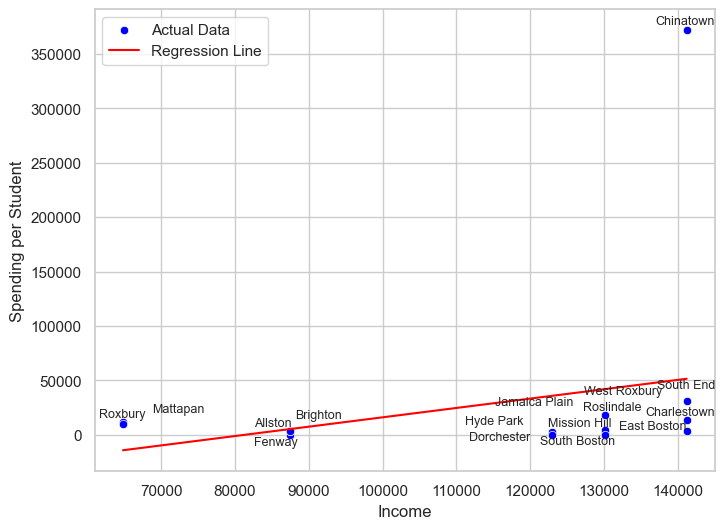

Slope: 0.8604644355640699
Intercept: -69896.05417602816
P-value for the slope: 0.3350950268039291


In [99]:
gdf_copy = gdf[(gdf["Income"] != 0) ]

X = gdf_copy[['Income']]
y = gdf_copy['Spending_Per_Capita'] 

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Print the model summary, which includes the p-value
print(model.summary())

# Generate predictions
x_range = np.linspace(gdf_copy['Income'].min(), gdf_copy['Income'].max(), 100)
x_range_const = sm.add_constant(x_range.reshape(-1, 1))
y_range = model.predict(x_range_const)

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spending_Per_Capita', data=gdf_copy, label='Actual Data', color='blue')

texts = []

# Add labels
for i in range(len(gdf_copy)):
    text = plt.text(gdf_copy['Income'].iloc[i], gdf_copy['Spending_Per_Capita'].iloc[i], 
                    gdf_copy['Neighborhood'].iloc[i], fontsize=9, ha='right', va='bottom')
    texts.append(text)

# Adjust the text labels to avoid overlap
adjust_text(texts)

plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.xlabel('Income')
plt.ylabel('Spending per Student')
plt.legend()
plt.show()

# Get the slope (coefficient) and intercept
slope = model.params['Income']
intercept = model.params['const']

# Display the values
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Display p-value for the slope
p_value = model.pvalues['Income']
print(f"P-value for the slope: {p_value}")